## Preprocessing
#### Time Series - _interpolate_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
# load data 
# Example: 2 months data with missing values
df = pd.read_csv("data/item_prices.csv")

df.head(10)

date  price
0  2020-07-01   3.78
1  2020-07-02   3.81
2  2020-07-06   3.88
3  2020-07-07   3.86
4  2020-07-08   3.85
5  2020-07-09   3.85
6  2020-07-10   3.85
7  2020-07-13   3.81
8  2020-07-14   3.85
9  2020-07-15   3.79

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
date     43 non-null object
price    43 non-null float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


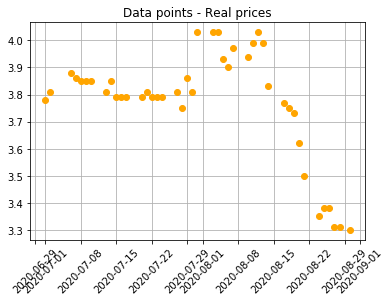

In [4]:
x = pd.to_datetime(df["date"])
y = df["price"]

plt.plot(x, y, 'o', c="orange")
plt.xticks(rotation=45)
plt.title("Data points - Real prices")

plt.grid()
plt.show()

Only 42 rows (days)

In [5]:
# Obtengo rango de fechas:
init_date = pd.to_datetime(df.iloc[0]["date"])
end_date  = pd.to_datetime(df.loc[len(df)-1,"date"])

# Genero indice para cada día, a partir de init_date, 
# calculando la diferencia entre init_date y la fecha de cada instancia:
df["date_idx"] = (pd.to_datetime(df["date"]) - init_date).astype('timedelta64[D]').astype(int)
df.head(10)

date  price  date_idx
0  2020-07-01   3.78         0
1  2020-07-02   3.81         1
2  2020-07-06   3.88         5
3  2020-07-07   3.86         6
4  2020-07-08   3.85         7
5  2020-07-09   3.85         8
6  2020-07-10   3.85         9
7  2020-07-13   3.81        12
8  2020-07-14   3.85        13
9  2020-07-15   3.79        14

In [6]:
# Genero interpolación (quadratic) para calcular el precio en las fechas faltantes.
interpolacion = interp1d(df["date_idx"], df["price"], kind="quadratic")

# Completo días entre init_date y end_date
all_dates = pd.Series(pd.date_range(init_date, end_date)) 

# Calculo indices para cada día:
x_all = (pd.to_datetime(all_dates) - init_date).astype('timedelta64[D]').astype(int)

# Aplico interpolación para determinar el precio en los días faltantes:
y_interp = interpolacion(x_all)

# Genero DF con todos los días y sus precios:
df_all_dates = pd.DataFrame({"date":all_dates,
                             "price":y_interp})
df_all_dates["price"] = round(df_all_dates["price"],2)

df_all_dates.shape

(61, 2)

2 full months!

In [7]:
df_all_dates.head(10)

date  price
0 2020-07-01   3.78
1 2020-07-02   3.81
2 2020-07-03   3.84
3 2020-07-04   3.87
4 2020-07-05   3.88
5 2020-07-06   3.88
6 2020-07-07   3.86
7 2020-07-08   3.85
8 2020-07-09   3.85
9 2020-07-10   3.85

In [8]:
df_all_dates.tail(10)

date  price
51 2020-08-21   3.50
52 2020-08-22   3.41
53 2020-08-23   3.36
54 2020-08-24   3.35
55 2020-08-25   3.38
56 2020-08-26   3.38
57 2020-08-27   3.31
58 2020-08-28   3.31
59 2020-08-29   3.31
60 2020-08-30   3.30

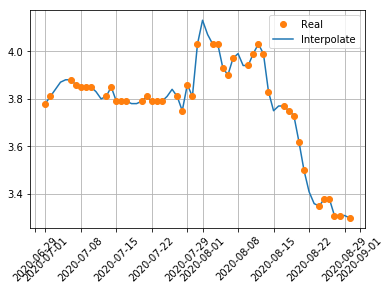

In [9]:
x = pd.to_datetime(df_all_dates["date"])
y = df_all_dates["price"]

x1 = pd.to_datetime(df["date"])
y1 = df["price"]

interpolar, = plt.plot(x, y, '-')
real, = plt.plot(x1, y1, 'o')

plt.xticks(rotation=45)

plt.legend([real, interpolar], ["Real", "Interpolate"])

plt.grid()
plt.show()